In [361]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [534]:
def familiarity(x, f, t):
    if not len(x):
        return 1
    
    result = 0
    for k, value in enumerate(x[:t]):
        result += f ** (t - k) if x[k] else 0
    return 1 - (result / t)

In [535]:
def discount(x, d, t):
    if not len(x):
        return 1
    
    result = 0
    for k, value in enumerate(x[:t]):
        result += d ** (t - k) if x[k] else 0
    return 1 - (result / t)

In [543]:
discounts = [0.8, 0.8, 0.79, 0.79, 0.81, 0.78, 0.9, 0.8]
familiarities = [0.1, 0.15, 0.15, 0.151, 0.2, 0.2, 0.21, 0.25]

discounts = np.random.rand(100, 1)
familiarities = np.random.rand(100, 1)


In [544]:
pizza = []
salad = []
sushi = []

p_scores = []
s_scores = []
su_scores = []
t = 50

X = np.ones((len(discounts), t))
scores = np.zeros((len(discounts), t))

for k in range(t):
    x = np.zeros(len(discounts))
    for j in range(len(discounts)):
        scores[j, k] = discount(X[j, :], discounts[j], k + 1) / familiarity(X[j, :], familiarities[j], k + 1)


    choice = np.argmax(scores[:, k])
    
    X[choice, k] = 1

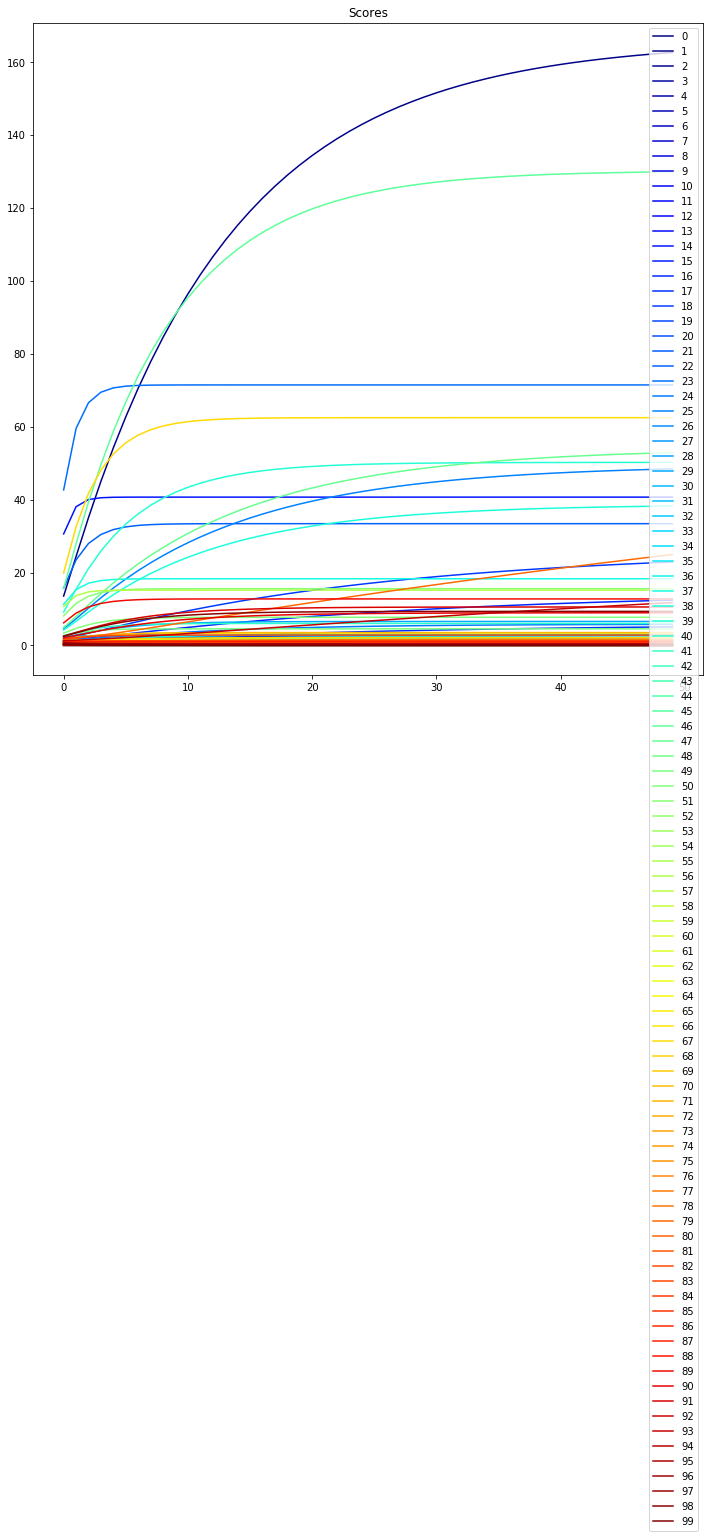

In [545]:
from matplotlib.pyplot import cm

color=cm.jet(np.linspace(0,1,len(discounts)))


%matplotlib inline

plt.figure(figsize=(12, 12))
for i in range(len(discounts)):
    plt.plot(range(t), scores[i, :], 'b', c = color[i], label=i)

plt.title('Scores')
plt.legend()
plt.show()

In [546]:
X

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

$$\frac{\delta x_i}{1 - f(x)}$$

Discount function

$$d(t, x_i) = 1 - \sum_{k=0}^{t - 1} \frac{\delta^{t - k}}{t}$$

Familiarity function
$$F(t, x_i) = \frac{1}{t}\sum_{k=1}^{t-1} f_i^{t-k} \mathbb{1}_{\{x_i\}}(t)$$

$$F(t, x_i) = \frac{1}{t}\exp{\sum_{k=1}^{t-1} f_i^{t-k} \mathbb{1}_{\{x_i\}}(t)}$$

In [295]:
discount(salad, salad_discount, 4)

1.0

In [335]:
sushi

[1, 1, 1]

In [337]:
su_scores

[1.0, 0.595, 0.487]

In [339]:
p_scores

[1.0, 1.0, 1.0]

In [340]:
s_scores

[1.0, 1.0, 1.0]